This file determines the centroid of each region in the shapefile. The centroid is then used for visualization purposes.

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd

In [2]:
columbia_df = gpd.read_file('../municipal_boundaries/MGN2012_MUNICIPIO_URBANCLUSTERS.shp')

In [3]:
def find_centroid(df, row):
    bounds = df['geometry'][row].bounds
    return (bounds[0] + bounds[2]) / 2, (bounds[1] + bounds[3]) / 2

In [4]:
find_centroid(columbia_df, 0)

(-70.46295795889267, 1.0128988055854506)

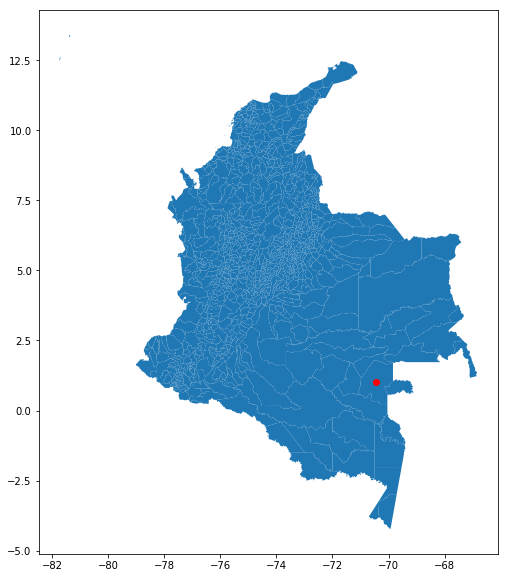

In [6]:
plt = columbia_df.plot(figsize=(20, 10))
centroid = find_centroid(columbia_df, 0)

plt.plot([centroid[0]], [centroid[1]], color='red', marker='o')

In [42]:
name = []
longs = []
lats = []
for i in range(len(columbia_df)):
    centroid = find_centroid(columbia_df, i)
    longs.append(centroid[0])
    lats.append(centroid[1])
    name.append(i)

In [43]:
region_to_centroid = pd.DataFrame.from_dict({'Name': name, 'Longitude': longs, 'Latitude': lats})

In [45]:
region_to_centroid.to_csv('../data/region-to-centroid.csv')